__In the cell below set your working directory, if needed__

In [13]:
# import os
# os.getcwd() 
# os.chdir("/Users/dhart/work/myRL/MultiArmedBandit")

**Multi-Armed Bandit Model**

For this experiment there will be three bandits with differing statistical properties.  The first bandit, bandit[0], will have a mean reward of zero, the second bandit, bandit[1], will have a mean reward of one, and the third bandit, bandit[2], will have a mean reward of minus one, which is a penalty.  The standard deviation of the distributions are all set to one.  The figure below shows these three probability distributions.  Obviously, the green distribution corresponds to bandit[0], the yellow/orange distribution corresponds to bandit[1], and the blue distribution corresponds to bandit[2].

![Normal Distributions](threebandits.png)

You are presented these three bandits not knowing the which bandit is which.  Moreover, you do not know what the uderlying probability distributions are.  You are given a fixed number of pulls of one of the arms.  On each iteration, you select an arm, pull it, and get a reward.  Your task is to maximize the reward, also known as the __value__, that you receive.  To maximize your reward you must devise a strategy, also known as a __policy__, for deciding which are to pull on each iteration. 

Here the policy will be what is called an epsilon greedy policy.  Current mean values will be kept and updated with each pull of each bandit.  With probability 1-eps, the bandit with the largest mean will be selected on an iteration.  This is exploitation.  With probability eps, one of the three bandits is chosen at random.  This is exploitation.

in the experiment below, exploration occurs 10% of the time.  The probability with which each of the three bandits are selected is equal.

In [14]:
import random
import numpy as np
%matplotlib inline

N = 1000
seed = 12345
random.seed(seed)

eps = 0.2

mu = np.empty(3)
mu[0] = 0
mu[1] = 2
mu[2] = -2

sigma = np.empty(3)
sigma[0] = 10
sigma[1] = 10
sigma[2] = 10

Bandit 0 - pulled 199 times. Estimated mean - -0.925368867212248
Bandit 1 - pulled 730 times. Estimated mean - 1.9534426303352885
Bandit 2 - pulled 71 times. Estimated mean - -3.489755456893579
Total reward   -  986.046923753589
Average reward -  0.986046923753589


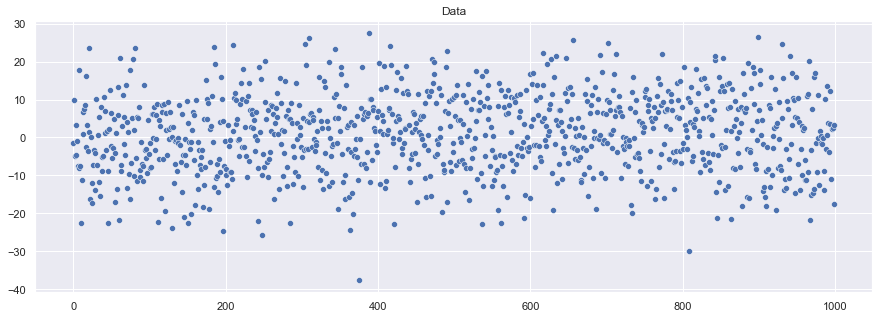

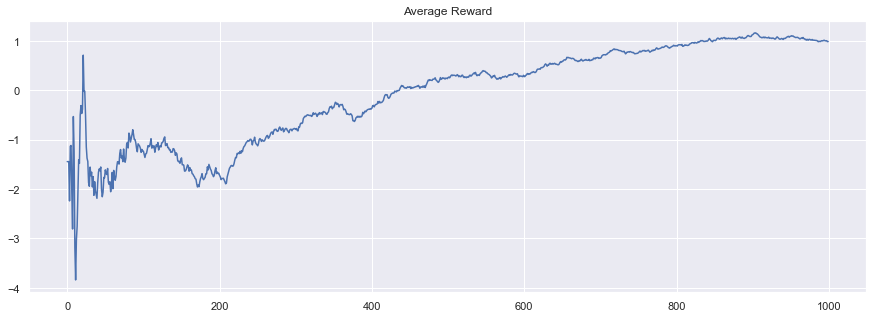

In [15]:
from run_experiment2 import run_experiment

run_experiment(mu, sigma, N, eps)

What one observes in the experiment above is that the suboptimal bandits bandits were "explored" 300 - 400 times and that the optimal bandit was pulled 9300 times.  More-or-less this makes sense becuase exploration occurs 10% of the time, or on about 1000 iterations.  Each of these explorations is evenly divided between the three bandits.  The average reward is 0.889.  The optimal reward would be 1.0, which would be achieved on averate by selecting, bandit[1] on each iteration. 

In an effort to try to confuse the decision making algorithm to choose suboptimal bandits let's set the standard deviation of the mean 0 bandit to 10 and the standard deviation of the mean -1 bandit to 100.  The standard deviation for the mean 1 bandit remains at 1.  

Bandit 0 - pulled 716 times. Estimated mean - 0.029835108519181884
Bandit 1 - pulled 8599 times. Estimated mean - 1.9978097390912628
Bandit 2 - pulled 685 times. Estimated mean - -6.235413117557998
Total reward   -  12953.580336789493
Average reward -  1.2953580336789494


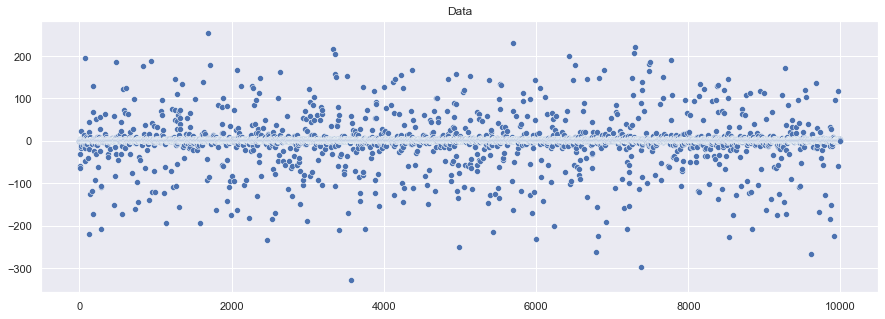

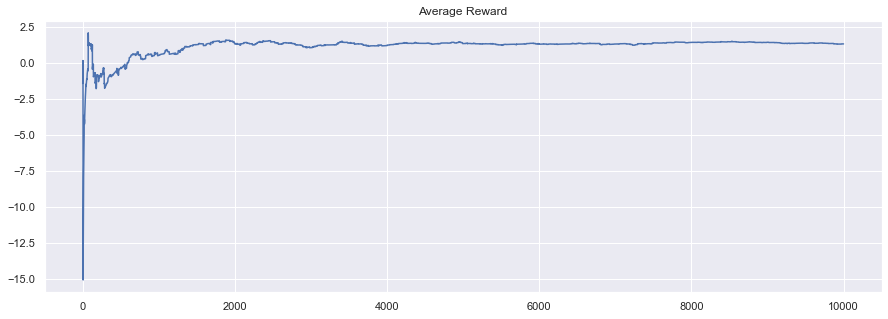

In [16]:
import random
import numpy as np
%matplotlib inline

N = 10000
seed = 12345
random.seed(seed)

eps = 0.2

mu = np.empty(3)
mu[0] = 0
mu[1] = 2
mu[2] = -2

sigma = np.empty(3)
sigma[0] = 10
sigma[1] = 1
sigma[2] = 100

run_experiment(mu, sigma, N, eps)

The data certainly have more variability.  However, we still see that the optimal bandit selected about 93% of the time and the suboptimal bandits only being selected 3% of the time.  It does take longer for the average reward to stabalize.

The epsilon greedy policy gives as optimal as it can be to optimize the reward. other policies such as explore then exploit and just explore give much fewer total rewards than epsilon greedy policy, and that is because if it does not explore in a certain iteration and only explore in the beginning, it might choose a bandit to exploit with less reward mean just because it that bandit gave a high value when it got pulled. The epsilon greedy policy will not give the maximum number of rewards because it has to build a knowledge of which bandit that has the highest reward. Epsilon greedy policy also can be improved to get more total rewards by changing the exploration phase occurs. We do not want more frequent exploration because we need to exploit the highest bandit at that time, and we do not want less frequent exploration because we need to update the means of each bandit